In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['species'].replace({'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'}, inplace=True)

/var/folders/qb/06xhfcmx5yzc7t8swxtczfpw0000gn/T/ipykernel_33767/2038838474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['species'].replace({'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'}, inplace=True)


In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data = df[['sepal_length', 'sepal_width','petal_length', 'petal_width']]
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
pred_y = df['species']

In [9]:
from sklearn.model_selection import train_test_split
main_data_train, main_data_test, pred_data_train, pred_data_test = train_test_split(data, pred_y, test_size=0.2)
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression()

In [11]:
model.fit(main_data_train, pred_data_train)

LogisticRegression()

In [12]:
modelPrediction= model.predict(main_data_test)
modelPrediction

array(['2', '1', '2', '0', '1', '1', '0', '2', '2', '1', '1', '1', '1',
       '1', '2', '2', '2', '0', '2', '1', '1', '1', '2', '0', '0', '2',
       '2', '2', '1', '2'], dtype=object)

In [13]:
model.score(main_data_test,pred_data_test)

0.9666666666666667

In [14]:
model.score(main_data_train,pred_data_train)

0.9833333333333333

In [15]:
specie = model.predict([[5.0,3.0,4.0,4.0]])
specie

/Library/Python/3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['2'], dtype=object)

In [16]:
from sklearn.metrics import confusion_matrix
#Creating Confusion Matrix for the model
conf_matrix= confusion_matrix(pred_data_test,modelPrediction)
conf_matrix

array([[ 5,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]])

Text(45.722222222222214, 0.5, 'Truth')

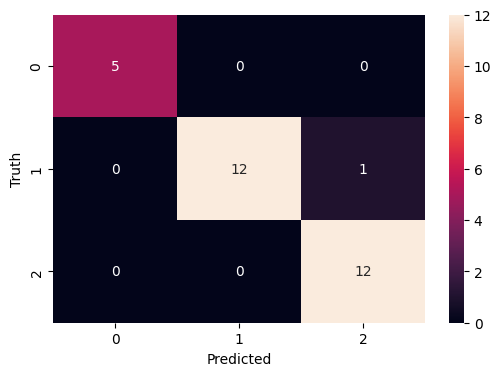

In [18]:
#printing Confusion Metrix
import seaborn as sn

plt.figure(figsize=(6,4))
sn.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')